In [90]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from sklearn.linear_model import LinearRegression
warnings.filterwarnings(action='ignore')
%matplotlib inline

# Gradient Descent

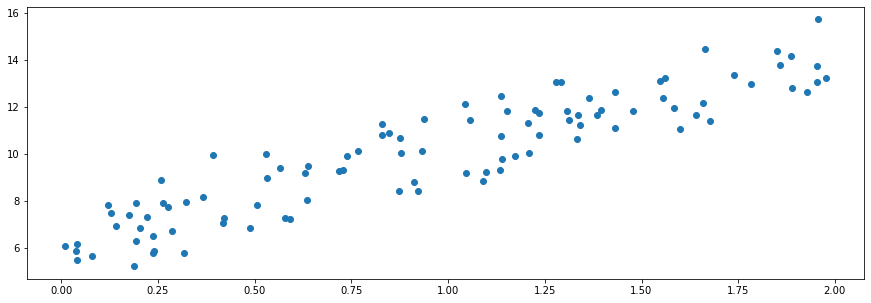

In [98]:
np.random.seed(0)
#y=4x+6을 근사하기 위한 100개의 데이터 세트를 만들고, 여기에 경사하강법을 이용해 회귀계수 w0, w1도출

#randn : 표준편차 1, 평균 0인 표준정규분포 난수 생성
#rand : 0~1의 균일분포 난수 생성
X = 2*np.random.rand(100,1)
y= 6+4*X+np.random.randn(100,1) #만약 독립변수가 여러개라면 모두 다른 값으로 초기화 해야함(그렇지 않으면 모두 같은 값으로 업데이트)

#X,y데이터 세트 산점도로 시각화
plt.figure(figsize=(15,5))
plt.scatter(X,y)
plt.show()

In [35]:
#비용 함수
def get_cost(y,y_pred):
    N=len(y)
    cost = np.sum(np.square(y-y_pred))/N
    return cost

In [40]:
#w1과 w0를 업데이트 할 w1_update, w0_update를 반환
def get_weight_updates(w1, w0, X,y,learning_rate=0.01):
    N=len(y)
    
    w1_update = np.zeros_like(w1)#w1과 동일한 모양과 데이터의 형태를 유지한 상태에서 값을 0으로 초기화
    w0_update = np.zeros_like(w0)#w1과 동일한 모양과 데이터의 형태를 유지한 상태에서 값을 0으로 초기화
    
    #예측 배열 계산하고 예측과 실제 값의 차이 계산
    #print("원본:",w1, type(w1))
    #print("T: ",w1.T, type(w1.T))
    y_pred = np.dot(X,w1.T)+w0
    diff= y-y_pred
        
    #w0_update를 dot행렬 연산으로 구하기 위해 모두 1값을 가진 행렬 생성
    w0_factors = np.ones((N,1))
    
    #w1과 w0을 업데이트할 w1_update와 w0_update계산
    w1_update = -(2/N)*learning_rate*(np.dot(X.T, diff))
    w0_update = -(2/N)*learning_rate*(np.dot(w0_factors.T, diff))
    
    return w1_update, w0_update

In [62]:
#입력 인자 iters로 주어진 횟수만큼 반복적으로 w1과 w0를 업데이터 적용함
def gradient_descent_steps(X, y, iters=10000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    
    #인자로 주어진 iters만큼 반복적으로 get_weight_updates()를 호출하여 w1, w0 업데이트 수행
    for ind in range(iters):
        w1_up,w0_up = get_weight_updates(w1,w0,X,y,0.01)
        w1 -= w1_up
        w0 -= w0_up
        
    return w1, w0

In [19]:
w1, w0 = gradient_descent_steps(X,y,10)

원본: [[0.]] <class 'numpy.ndarray'>
T:  [[0.]] <class 'numpy.ndarray'>
원본: [[0.21502681]] <class 'numpy.ndarray'>
T:  [[0.21502681]] <class 'numpy.ndarray'>
원본: [[0.42100578]] <class 'numpy.ndarray'>
T:  [[0.42100578]] <class 'numpy.ndarray'>
원본: [[0.61831123]] <class 'numpy.ndarray'>
T:  [[0.61831123]] <class 'numpy.ndarray'>
원본: [[0.80730201]] <class 'numpy.ndarray'>
T:  [[0.80730201]] <class 'numpy.ndarray'>
원본: [[0.98832217]] <class 'numpy.ndarray'>
T:  [[0.98832217]] <class 'numpy.ndarray'>
원본: [[1.1617015]] <class 'numpy.ndarray'>
T:  [[1.1617015]] <class 'numpy.ndarray'>
원본: [[1.32775621]] <class 'numpy.ndarray'>
T:  [[1.32775621]] <class 'numpy.ndarray'>
원본: [[1.48678941]] <class 'numpy.ndarray'>
T:  [[1.48678941]] <class 'numpy.ndarray'>
원본: [[1.6390917]] <class 'numpy.ndarray'>
T:  [[1.6390917]] <class 'numpy.ndarray'>


In [41]:
w1, w0 = gradient_descent_steps(X,y)

In [42]:
print(f"w1: {np.round(w1[0,0],3)}, w0: {np.round(w0[0,0],3)}")

w1: 3.968, w0: 6.222


In [43]:
y_pred = w1[0,0]*X+w0
print(f"Gradient Descent Total Cost:{round(get_cost(y,y_pred),4)}")

Gradient Descent Total Cost:0.9924


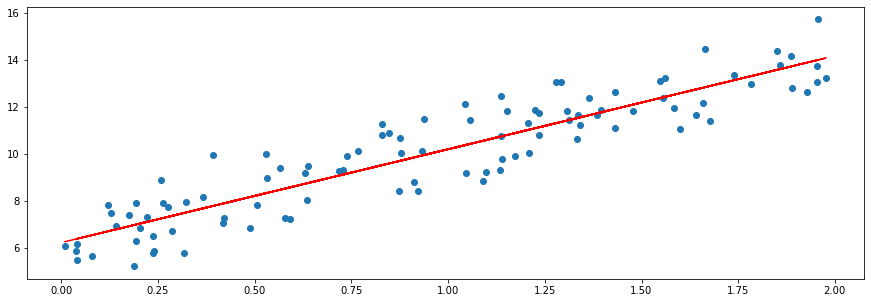

In [61]:
plt.figure(figsize=(15,5))
plt.scatter(X,y)
plt.plot(X,y_pred,color='r')
plt.show()

<br><br><br>
# SGD(Stochastic Gradient Descent)

- 전체 입력 데이터로 w가 업데이트되는 값을 계산하는 것이 아니라, 일부 데이터만 이용해 w가 업데이트되는 값을 계산한다.<br>
-> 빠르다.(대용량 데이터에 적합)

In [66]:
def stochastic_gradient_descent_steps(X, y, batch_size= 10, iters=1000):
    w0 = np.zeros((1,1))
    w1 = np.zeros((1,1))
    prev_cost = 100000
    iter_index = 0
    
    for ind in range(iters):
        np.random.seed(ind)
        stochastic_random_index = np.random.permutation(X.shape[0])#shuffle과 달리 원본은 유지하고 array를 복사하여 return
        #print(stochastic_random_index)
        #전체 X,y데이터에서 랜덤하게 batch_size만큼 데이터를 추출해 sample_X, sample_y로 저장
        sample_X,sample_y = X[stochastic_random_index[0:batch_size]], y[stochastic_random_index[0:batch_size]]
        
        #랜덤하게 batch_size만큼 추출된 데이터 기반으로 w1_update, w0_update 계산 후 업데이트
        w1_up, w0_up= get_weight_updates(w1,w0,sample_X, sample_y, 0.01)
        w1-=w1_up
        w0-=w0_up
    return w1,w0

In [ ]:
rand

In [69]:
w1, w0 = stochastic_gradient_descent_steps(X,y)
print("w1: ", round(w1[0,0],3), "w0: ",round(w0[0,0],3))
y_pred = w1[0,0]*X + w0
print('Stochastic Gradient Descent Total cost: ', round(get_cost(y,y_pred),4))

w1:  4.028 w0:  6.156
Stochastic Gradient Descent Total cost:  0.9937


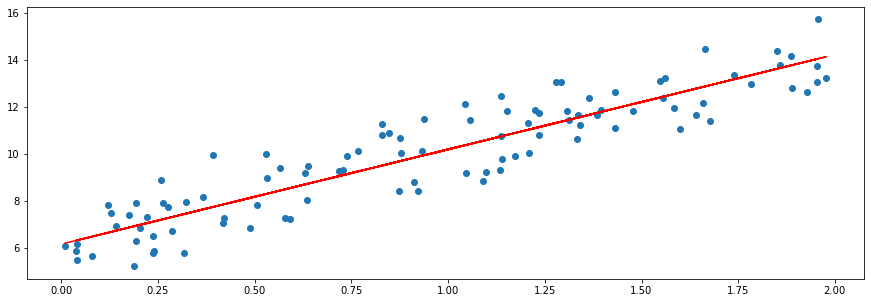

In [71]:
plt.figure(figsize=(15,5))
plt.scatter(X,y)
plt.plot(X,y_pred,color='r')
plt.show()

- 예측 오류 비용: 0.9924(GD),0.9937(SGD)
- GD와 큰 차이 없으므로 큰 데이터를 처리하는 경우, SGD를 이용하는 것이 옳은 판단일 가능성이 크다.

<br><br><br>
# Polynomial Regression

- sklearn은 다항 회귀를 위한 클래스를 제공하지 않음 -> 비선형 함수를 선형 모델에 적용시키는 방법 有

In [73]:
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

#다항식으로 변환한 단항식 생성, [[0,1], [2,3]]의 2*2행렬 생성
X = np.arange(4).reshape(2,2)
print('일차 단항식 계수 피처: ',X)

일차 단항식 계수 피처:  [[0 1]
 [2 3]]


In [75]:
#degree = 2인 2차 다항식으로 변환하기 위해 PolynomialFeatures를 이용해 변환
poly=PolynomialFeatures(degree=2)
poly.fit(X)
poly_ftr = poly.transform(X) #[1, x1, x2, x1^2, x1*x2, x2^2] 형태로 변환 (1은 bias)
print("변환된 2차 다항식 계수 피처: ",poly_ftr) 

변환된 2차 다항식 계수 피처:  [[1. 0. 1. 0. 0. 1.]
 [1. 2. 3. 4. 6. 9.]]


In [96]:
def polynomial_func(X):
    y= 1 + 2*X[:,0] + 3*X[:,0]**2 + 4*X[:,1]**3
    return y

In [85]:
X= np.arange(4).reshape(2,2)
print('일차 단항식 계수 feature:\n',X)
y= polynomial_func(X)
print('삼차 다항식 결정값:\n ',y)

일차 단항식 계수 feature:
 [[0 1]
 [2 3]]
삼차 다항식 결정값:
  [  5 125]


In [92]:
#3차 다항식 변환
poly_ftr= PolynomialFeatures(degree=3).fit_transform(X)
print('3차 다항식 계수 feature: \n', poly_ftr)

#Linear Regression에 3차 다항식 계수 feature와 3차 다항식 결정값으로 학습 후 회귀 계수 확인
model = LinearRegression()
model.fit(poly_ftr, y)
print('\nPolynomial 회귀 계수\n', np.round(model.coef_,2)) #coef_ 회귀계수만 
print('\nPolynomial 회귀 Shape:',model.coef_.shape)

3차 다항식 계수 feature: 
 [[ 1.  0.  1.  0.  0.  1.  0.  0.  0.  1.]
 [ 1.  2.  3.  4.  6.  9.  8. 12. 18. 27.]]

Polynomial 회귀 계수
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]

Polynomial 회귀 Shape: (10,)


In [99]:
from sklearn.pipeline import Pipeline

#Pipeline객체로 Streamline하게 Polynomial Feature 변환과 Linear Regression을 연결
model = Pipeline([('poly',PolynomialFeatures(degree=3)),('linear', LinearRegression())])
X= np.arange(4).reshape(2,2)
y= polynomial_func(X)

model = model.fit(X,y)

print('Polynomial 회귀 계수 \n', np.round(model.named_steps['linear'].coef_,2))

Polynomial 회귀 계수 
 [0.   0.18 0.18 0.36 0.54 0.72 0.72 1.08 1.62 2.34]


- 단항 vs 다항

In [266]:
X_ = np.random.randint(0,100,10).reshape(-1,1)
y_ = X_+np.arange(10).reshape(-1,1)
d= 2 #다항식 차수

In [267]:
lr_m,lr_p = LinearRegression(),LinearRegression() #단항 회귀 모델 / 다항 회귀 모델

In [268]:
lr_m.fit(X_, y_)

LinearRegression()

In [269]:
lr_p.fit(PolynomialFeatures(degree=d).fit_transform(X_),y_)

LinearRegression()

In [270]:
#Test 데이터 생성
X_tmp = np.random.randint(0,100,30).reshape(-1,1)
y_m = lr_m.predict(X_tmp)
y_p = lr_p.predict(PolynomialFeatures(degree=d).fit_transform(X_tmp))

In [271]:
pred_m, pred_p = lr_m.predict(X_), lr_p.predict(PolynomialFeatures(degree=d).fit_transform(X_))

In [272]:
def mean_squared_error(y,y_pred):
    return sum((i-j)**2 for i,j in zip(y,y_pred))/len(y)

In [273]:
mean_squared_error(y_,pred_p)[0]

5.480869774092359

In [274]:
mean_squared_error(y_,pred_m)[0]

6.163724281559331

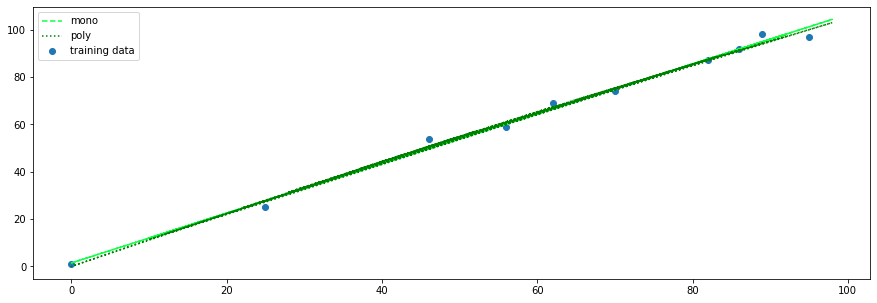

In [280]:
plt.figure(figsize=(15,5))
plt.scatter(X_,y_,label="training data")
plt.plot(X_tmp, y_m,label="mono",linestyle='--', color = '#11ff44')
plt.plot(X_tmp, y_p,label="poly",linestyle=':', color = 'g')
plt.legend()
plt.show()